In [96]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [109]:


data = pd.read_csv('nuevo_labels.csv')

X = data[['sub1', 'sub2']]
y = data['verdict']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X['sub1'] + ' ' + X['sub2'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42)

clf = xgb.XGBClassifier(n_estimators=200,  learning_rate=0.1)
# 

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo (Prueba): %.2f%%" % (accuracy * 100.0))

y_train_pred = clf.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
print("Precisión del modelo (Entrenamiento): %.2f%%" %
      (train_accuracy * 100.0))


Precisión del modelo (Prueba): 86.86%
Precisión del modelo (Entrenamiento): 100.00%


Matriz de confusión:
[[91  9]
 [ 9 28]]


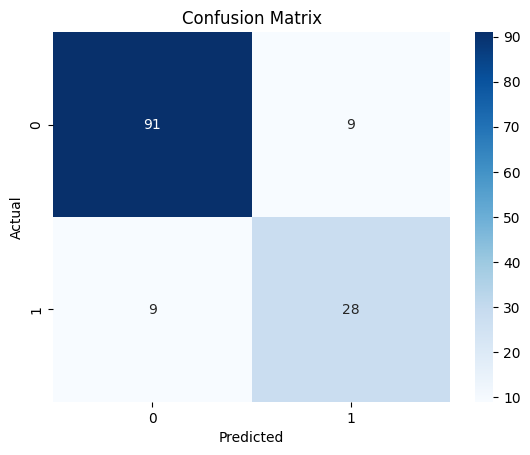

In [110]:
confusion_mat = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(confusion_mat)

# Display the confusion matrix as a heatmap
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Matriz de confusión (porcentaje):
[[0.91       0.09      ]
 [0.24324324 0.75675676]]


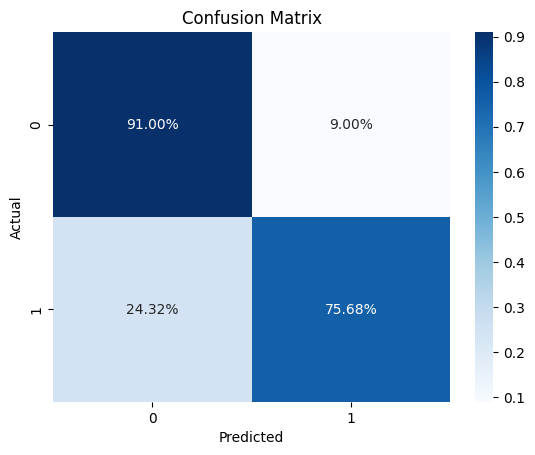

In [111]:
confusion_mat = confusion_matrix(y_test, y_pred)
confusion_mat_percentage = confusion_mat.astype(
    'float') / confusion_mat.sum(axis=1)[:, np.newaxis]

print("Matriz de confusión (porcentaje):")
print(confusion_mat_percentage)

# Display the confusion matrix as a heatmap
sns.heatmap(confusion_mat_percentage, annot=True, fmt=".2%", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
